<a href="https://colab.research.google.com/github/SusanaAlvarezC/Fundamentos_Clases/blob/main/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estudiantes**:

*  ## Alejandro Martínez Hernández | alemaher12@gmail.com
*  ## Daniel Marín Vélez           | daniel.marinv@udea.edu.co
*  ## Susana Álvarez               | susanamalc@gmail.com  

   
### ***Nota para el profesor:***

**↤ ↤** Puede usar el navegador a la izquierda **↤ ↤**

# **OBJETIVO**

Probabilidad de ganar con 3 o 5 balotas el baloto, empleando las estrategias: variando o usando el mismo número por cada sorteo

### **1. Exploración de datos**

Date,C1,C2,C3,C4,C5,SB
4/22/2017,15,28,36,37,41,10
4/26/2017,1,2,25,31,33,14
4/29/2017,6,19,25,28,36,1
5/3/2017,5,6,7,12,37,6
5/6/2017,1,20,36,39,43,10



Número de filas: 603
Número de columnas: 7


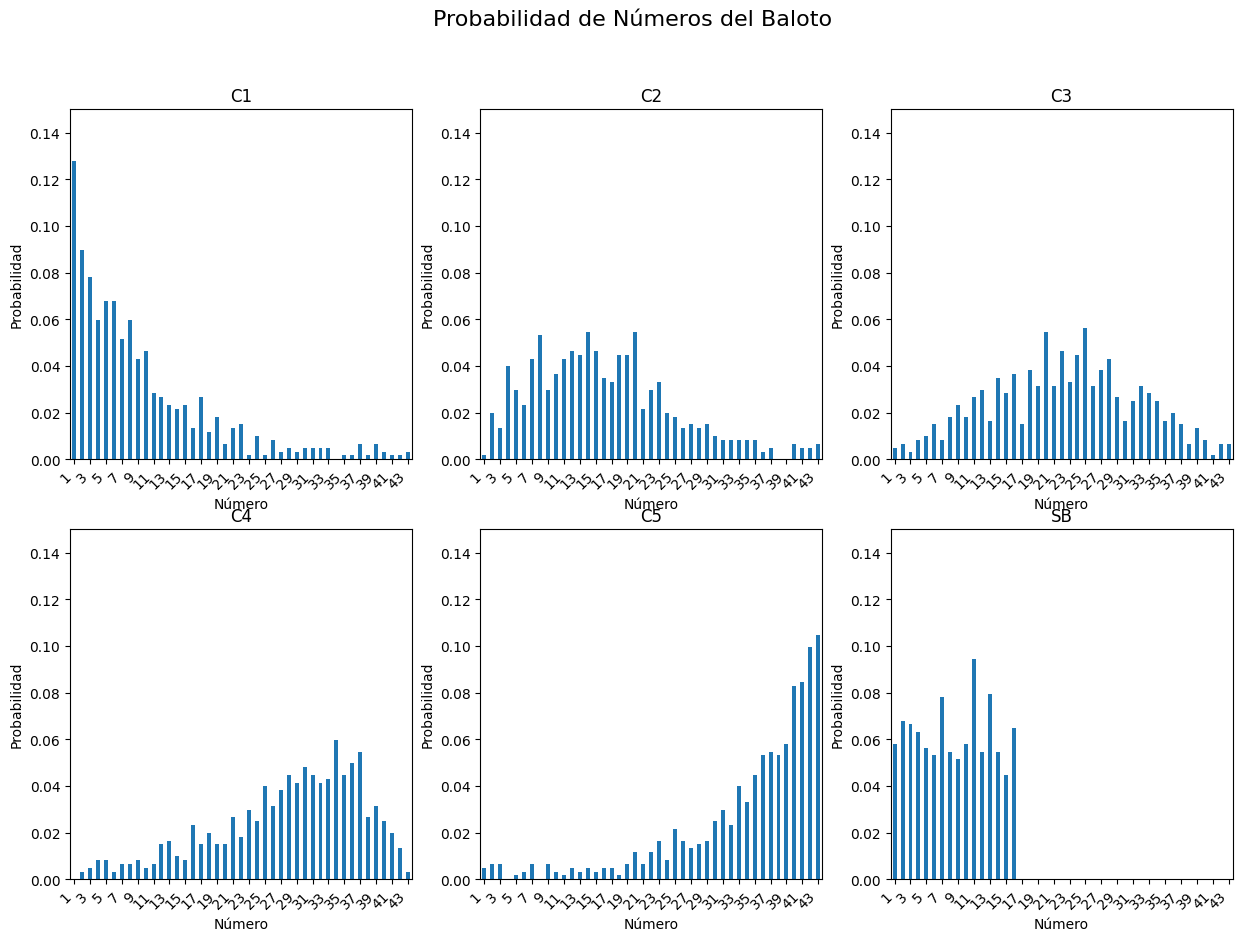

In [3]:
# Primera actividad: Obtener el DataFrame y caracterizarlo

# Se importan las librerías necesarias para el desarrollo del reto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from mpl_toolkits.mplot3d import Axes3D

# Obtención de datos del DataFrame del Baloto
baloto = pd.read_csv('https://raw.githubusercontent.com/SusanaAlvarezC/Fundamentos_Clases/main/baloto.csv')
display(HTML(baloto.head().to_html(index=False)))

#Descripción data set
num_filas, num_columnas = baloto.shape
print(f"\nNúmero de filas: {num_filas}")
print(f"Número de columnas: {num_columnas}")

# Inicializacion columnas data frame alternos
columnas_interes = ['C1', 'C2', 'C3', 'C4', 'C5', 'SB']

# Calcular la probabilidad de cada número en las columnas de interés
probabilidades = baloto[columnas_interes].apply(pd.Series.value_counts, normalize=True)

# Crear un gráfico de barras para cada columna
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle("Probabilidad de Números del Baloto", fontsize=16)

for i, col in enumerate(columnas_interes):
    ax = axes[i // 3, i % 3]
    probabilidades[col].sort_index().plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel("Número")
    ax.set_ylabel("Probabilidad")
    ax.set_ylim(0, 0.15)
    tick_positions = np.arange(0, len(probabilidades[col].index), step=2)
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(probabilidades[col].index[tick_positions], rotation=45, ha='right')



### **2. Cálculos de probabilidad y representación gráfica**

Las columnas empleadas para el análisis son:  ['C1', 'C2', 'C3']
El número de simulaciones que se realizó para el experimento son:  1000
Ganadores usando el mismo número: 5
Ganadores usando un número diferente: 4




,Ganador_diferente_numero,Ganador_mismo_numero
numero_ganadores,4,5
apuestas,603000,603000
probabilidad,0.000663,0.000829


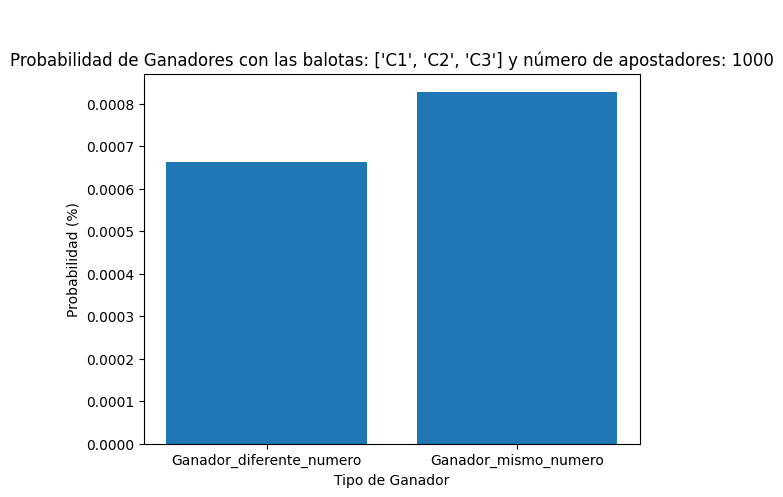

In [7]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

def generar_numero(cantidad_cols):
    """
    Genera un número aleatorio según las reglas dadas por el Baloto.

    Parámetros:
        cantidad_cols (int): El número de columnas a generar.

    Retorna:
        np.ndarray: Un arreglo con números aleatorios generados.
    """
    return np.random.choice(np.arange(1, 44), cantidad_cols)

def comparar(df_1, df_2):
    """
    Compara dos DataFrames y devuelve un DataFrame de igualdad por fila.

    Parámetros:
        df_1 (pd.DataFrame): El primer DataFrame a comparar.
        df_2 (pd.DataFrame): El segundo DataFrame a comparar.

    Retorna:
        pd.DataFrame: DataFrame de igualdad por fila.
    """
    return pd.DataFrame((df_1 == df_2).all(axis=1))

# Obtención de datos del DataFrame del Baloto
url = 'https://raw.githubusercontent.com/SusanaAlvarezC/Fundamentos_Clases/main/baloto.csv'
cantidad_cols = ['C1', 'C2', 'C3']  # ,'C4', 'C5']
print('Las columnas empleadas para el análisis son: ', cantidad_cols)
baloto = pd.read_csv(url, sep=',')
baloto_2 = baloto[cantidad_cols]

num_filas = baloto_2['C1'].count()

total_diferentes = 0
total_iguales = 0
cont_simulaciones = 0
cant_simulaciones = 1000

print('El número de simulaciones que se realizó para el experimento son: ', cant_simulaciones)

while cont_simulaciones <= cant_simulaciones:
    valores = [generar_numero(len(cantidad_cols))
               for _ in range(num_filas)]
    diferente_numero = pd.DataFrame(valores, columns=cantidad_cols)

    datos_repetidos = np.repeat([generar_numero(len(cantidad_cols))],
                                num_filas, axis=0)
    mismo_numero = pd.DataFrame(datos_repetidos, columns=cantidad_cols)

    comparacion1 = comparar(mismo_numero, baloto_2)
    comparacion2 = comparar(diferente_numero, baloto_2)

    try:
        total_diferentes += comparacion2[0].value_counts().loc[True]
    except:
        total_diferentes += 0

    try:
        total_iguales += comparacion1[0].value_counts().loc[True]
    except:
        total_iguales += 0

    cont_simulaciones += 1

print(f'Ganadores usando el mismo número: {total_iguales}')
print(f'Ganadores usando un número diferente: {total_diferentes}\n\n')

# Calcular el número de filas
num_filas = len(baloto)

# Calcular el número de celdas
num_celdas = num_filas * cant_simulaciones

# Crear tabla con los resultados
tabla_resultados = pd.DataFrame(columns=["Ganador_diferente_numero", "Ganador_mismo_numero"], index=["numero_ganadores", "apuestas", "probabilidad"])
tabla_resultados.loc["numero_ganadores", "Ganador_diferente_numero"] = total_diferentes
tabla_resultados.loc["numero_ganadores", "Ganador_mismo_numero"] = total_iguales

total_apuestas_mismo_numero = total_iguales + total_diferentes
total_apuestas_diferente_numero = total_diferentes
tabla_resultados.loc["apuestas", "Ganador_diferente_numero"] = num_celdas
tabla_resultados.loc["apuestas", "Ganador_mismo_numero"] = num_celdas

tabla_resultados.loc["probabilidad", "Ganador_diferente_numero"] = (total_diferentes / num_celdas) * 100
tabla_resultados.loc["probabilidad", "Ganador_mismo_numero"] = (total_iguales / num_celdas) * 100

display(tabla_resultados)

# Crear un gráfico de barras de las probabilidades
nombres_columnas = tabla_resultados.columns
probabilidades = tabla_resultados.loc["probabilidad"].values

plt.bar(nombres_columnas, probabilidades)
plt.title(f'\n\nProbabilidad de Ganadores con las balotas: {cantidad_cols} y número de apostadores: {cant_simulaciones}')
plt.xlabel("Tipo de Ganador")
plt.ylabel("Probabilidad (%)")
plt.show()

### 3. **Cálculo de probabilidad de ganar el Baloto en los posibles años que quedan de vida de la persona**

In [8]:

import numpy as np
import pandas as pd
from scipy.stats import binom

# Función para generar un número aleatorio según las reglas dadas por
# el Baloto
def generar_numero(cantidad_cols):
    return np.random.choice(np.arange(1, 44), cantidad_cols)

# Función para comparar los DataFrames
def comparar(df_1, df_2):
    return pd.DataFrame((df_1 == df_2).all(axis=1))

# Obtención de datos del DataFrame del Baloto
url = 'https://raw.githubusercontent.com/SusanaAlvarezC/Fundamentos_Clases/main/baloto.csv'
cantidad_cols = ['C1', 'C2', 'C3']  # ,'C4', 'C5']
baloto = pd.read_csv(url, sep=',')
baloto_2 = baloto[cantidad_cols]

num_filas = baloto_2['C1'].count()

total_diferentes = 0
total_iguales = 0
cont_simulaciones = 0
cant_simulaciones = 1000

while cont_simulaciones <= cant_simulaciones:
    valores = [generar_numero(len(cantidad_cols))
               for _ in range(num_filas)]
    diferente_numero = pd.DataFrame(valores, columns=cantidad_cols)

    datos_repetidos = np.repeat([generar_numero(len(cantidad_cols))],
                                num_filas, axis=0)
    mismo_numero = pd.DataFrame(datos_repetidos, columns=cantidad_cols)

    comparacion1 = comparar(mismo_numero, baloto_2)
    comparacion2 = comparar(diferente_numero, baloto_2)

    try:
        total_diferentes += comparacion2[0].value_counts().loc[True]
    except:
        total_diferentes += 0

    try:
        total_iguales += comparacion1[0].value_counts().loc[True]
    except:
        total_iguales += 0

    cont_simulaciones += 1

# Calcular la esperanza de vida según el género
genero = input("¿Eres hombre o mujer? ").lower()
if genero == "hombre":
    esperanza_vida = 73
elif genero == "mujer":
    esperanza_vida = 80
else:
    print("Género no válido. Se asumirá una esperanza de vida de 76 años.")
    esperanza_vida = 76

# Calcular años de vida restantes
edad = int(input("Ingresa tu edad: "))
anios_vida_restantes = esperanza_vida - edad

# Calcular número de sorteos en la vida restante
sorteos_por_semana = 2
sorteos_por_anio = sorteos_por_semana * 52
sorteos_en_vida_restante = sorteos_por_anio * anios_vida_restantes

# Calcular la probabilidad de ganar jugando el mismo número
probabilidad_mismo_numero = (total_iguales / num_celdas) * 100

# Calcular la probabilidad de ganar con número aleatorio
probabilidad_numero_aleatorio = (total_diferentes / num_celdas) * 100

# Calcular la probabilidad usando la fórmula binomial para el mismo
# número
p_exito_mismo_numero = probabilidad_mismo_numero / 100
k_exitos = 1
n_intentos = sorteos_en_vida_restante

probabilidad_binomial_mismo_numero = binom.pmf(k_exitos, n_intentos, p_exito_mismo_numero) * 100

# Calcular la probabilidad usando la fórmula binomial para número
# aleatorio
p_exito_numero_aleatorio = probabilidad_numero_aleatorio / 100

probabilidad_binomial_numero_aleatorio = binom.pmf(k_exitos, n_intentos, p_exito_numero_aleatorio) * 100

print(f"\nTienes {anios_vida_restantes} años de vida restantes según la esperanza de vida promedio.")
print(f"En ese tiempo, podrías jugar aproximadamente {sorteos_en_vida_restante} sorteos.")

print(f"Probabilidad de ganar jugando el mismo número durante tu vida: {probabilidad_binomial_mismo_numero:.6f}%")
print(f"Probabilidad de ganar jugando número aleatorio durante tu vida: {probabilidad_binomial_numero_aleatorio:.6f}%")

¿Eres hombre o mujer? mujer
Ingresa tu edad: 36

Tienes 44 años de vida restantes según la esperanza de vida promedio.
En ese tiempo, podrías jugar aproximadamente 4576 sorteos.
Probabilidad de ganar jugando el mismo número durante tu vida: 3.653117%
Probabilidad de ganar jugando número aleatorio durante tu vida: 3.653117%


### **4. Randomizar números ganadores por sorteo**

El número de simulaciones que se realizó para el experimento son:  1000
Ganadores usando el mismo número: 9
Ganadores usando un número diferente: 1


,Ganador_diferente_numero,Ganador_mismo_numero
numero_ganadores,1,9
apuestas,603000,603000
probabilidad,0.000166,0.001493


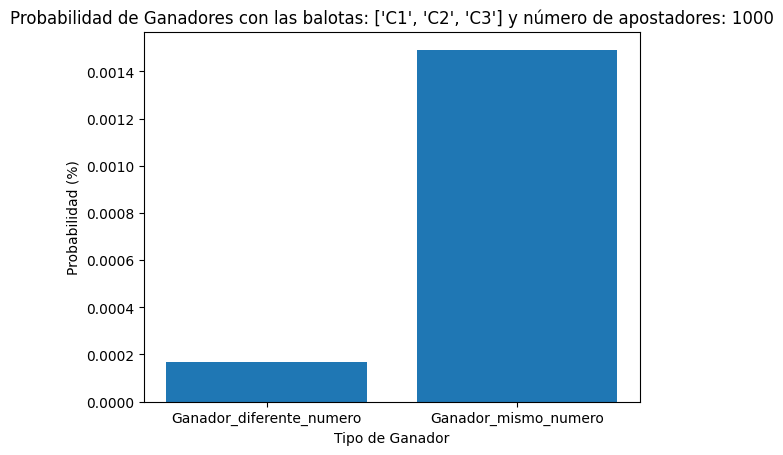

In [9]:
# Evaluar si hay impacto en la probabilidad al
# randomizar los resultados detallados en el DataFrame del Baloto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función para generar un número aleatorio según las reglas dadas por
# el Baloto
def generar_numero(cantidad_cols):
    '''
    Función que retorna un número aleatorio según las reglas dadas por
    Baloto

    Ex:
        In[0] = x = generar_numero(4)
        Out[0] = [43, 6, 9, 23]
    '''
    return np.random.choice(np.arange(1, 44), cantidad_cols)

# Función para comparar los DataFrames
def comparar(df_1, df_2):
    '''
    Función que compara línea a línea dos DataFrames y regresa un
    DataFrame de una columna con valores booleanos

    Args:
        df_1 (pandas.DataFrame): base de datos 1
        df_2 (pandas.DataFrame): base de datos 2

    Ex:
        In[0] = x = comparar(df_baloto, df_comparar)
        Out[0] =
                    0      False
                    1      False
                    2      False
                    3      False
                    4      False
                        ...
                    598    False
                    599    False
                    600    False
                    601    False
                    602    False
                    Length: 603, dtype: bool
    '''
    return pd.DataFrame((df_1 == df_2).all(axis=1))

# Obtención de datos del DataFrame del Baloto
url = 'https://raw.githubusercontent.com/SusanaAlvarezC/Fundamentos_Clases/main/baloto.csv'
cantidad_cols = ['C1', 'C2', 'C3']  # ,'C4','C5']

baloto = pd.read_csv(url, sep=',')
baloto_2 = baloto[cantidad_cols]

num_filas = baloto_2['C1'].count()

total_diferentes = 0
total_iguales = 0
cont_simulaciones = 0
cant_simulaciones = 1000

print('El número de simulaciones que se realizó para el experimento son: ', cant_simulaciones)

while cont_simulaciones <= cant_simulaciones:
    valores = [generar_numero(len(cantidad_cols))
               for _ in range(num_filas)]
    diferente_numero = pd.DataFrame(valores, columns=cantidad_cols)

    datos_repetidos = np.repeat([generar_numero(len(cantidad_cols))],
                                num_filas, axis=0)
    mismo_numero = pd.DataFrame(datos_repetidos, columns=cantidad_cols)

    comparacion1 = comparar(mismo_numero, baloto_2)
    comparacion2 = comparar(diferente_numero, baloto_2)

    try:
        total_diferentes += comparacion2[0].value_counts().loc[True]
    except:
        total_diferentes += 0

    try:
        total_iguales += comparacion1[0].value_counts().loc[True]
    except:
        total_iguales += 0

    cont_simulaciones += 1

print(f'Ganadores usando el mismo número: {total_iguales}')
print(f'Ganadores usando un número diferente: {total_diferentes}')

# Calcular el número de filas
num_filas = len(baloto)

# Calcular el número de celdas
num_celdas = num_filas * cant_simulaciones

# Crear tabla con los resultados
tabla_resultados = pd.DataFrame(columns=["Ganador_diferente_numero", "Ganador_mismo_numero"], index=["numero_ganadores", "apuestas", "probabilidad"])
tabla_resultados.loc["numero_ganadores", "Ganador_diferente_numero"] = total_diferentes
tabla_resultados.loc["numero_ganadores", "Ganador_mismo_numero"] = total_iguales

total_apuestas_mismo_numero = total_iguales + total_diferentes
total_apuestas_diferente_numero = total_diferentes
tabla_resultados.loc["apuestas", "Ganador_diferente_numero"] = num_celdas
tabla_resultados.loc["apuestas", "Ganador_mismo_numero"] = num_celdas

tabla_resultados.loc["probabilidad", "Ganador_diferente_numero"] = (total_diferentes / num_celdas) * 100
tabla_resultados.loc["probabilidad", "Ganador_mismo_numero"] = (total_iguales / num_celdas) * 100

display(tabla_resultados)

# Crear un gráfico de barras de las probabilidades
nombres_columnas = tabla_resultados.columns
probabilidades = tabla_resultados.loc["probabilidad"].values

plt.bar(nombres_columnas, probabilidades)
plt.title(f'Probabilidad de Ganadores con las balotas: {cantidad_cols} y número de apostadores: {cant_simulaciones}')
plt.xlabel("Tipo de Ganador")
plt.ylabel("Probabilidad (%)")
plt.show()